# Homework Assignment 2
## Agent Based Modeling (ABM), Graph Theory, and Linear Regression

### <p style="text-align: right;"> &#9989; Brendan Hunt</p>
### <p style="text-align: right;"> &#9989; Brendanhhh</p>


### Goals for this homework assignment
By the end of this assignment, you should be able to:
* Understand and implement agent objects.
* Run and modify agent based models.
* Read and understand someone else's code and be able to use it.
* Use your Pandas/Networkx skills to form a graph from data, visualize it, and answer questions about the data.
* Read documentation to understand and use Networkx methods that you may not be familiar with

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

There are **80 points** possible on this assignment. Point values for each part are included in the section headers and question prompts.

**This assignment is due on Friday, March 15th at 11:59pm ET.** It should be uploaded into the "Homework Assignments" submission folder for Homework #2.  Submission instructions can be found at the end of the notebook.


### Please read the updated Generative AI policy for this course https://msu-cmse-courses.github.io/cmse202-S24-jb/course_materials/CMSE202_GenerativeAI_Policy.html

### In particular, you should not rely solely on AI tools to complete questions in this assignment. Simply copying questions from the assignments into generative AIs and pasting the answers back into the assignments with non-essential modifications are NOT acceptable and may be considered plagiarism.

---
## Part 1: Add to your Git repository to track your progress on your assignment (8 points)

For this assignment, you're going to add it to the `cmse202-s24-turnin` repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to

**&#9989; Do the following**:

1. Navigate to your `cmse202-s24-turnin` repository and create a new directory called `hw-02`.
2. Move this notebook into that **new directory** in your repository, then **add it and commit it to your repository**.
3. Finally, to test that everything is working, "git push" the file so that it ends up in your GitHub repository.

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-s24-turnin`" repository inside the `hw-02` directory that you just created.  Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.

&#9989; **1.1 Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below.

<font size=6 color="#009600">&#9998;</font> git clone https://github.com/Brendanhhh/cmse202-s24-turnin.git

**You MUST commit and push your notebook multiple times during this assignment.**

---
## Part 2: Implement ABM for Conway's Game of Life (39 points)

[The Game of Life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life) is an example of cellular automation which was devised by the mathematician John Conway in 1970. The game is played on a rectangular grid of "cells". Each cell is adjacent to up to eight neighbor cells. Initially, each cell is either alive or dead. At each timestep, the states (alive/dead) of the cells update simultaneously according to the following rules:


<img src="https://i.ibb.co/HtSXfcF/Game-Of-Life-Rules1.png" alt="Image adapted from https://www.quantamagazine.org/maths-game-of-life-reveals-long-sought-repeating-patterns-20240118/">


Note that the initial state of the grid completely determines how the grid evolves over time. Also, each cell just needs information about its neighbors at the current iteration to determine its state at the next iteration. 

In this part of the assignment, we will implement the Game of Life using OOP. 

&#9989; **Question 2.1 (10 points)**: First, let's implement the class for the individual cells in the simulation. All of the necessary methods for the `Cell()` class are included below, and the `__init__()` method is completed for you. To finish this class, read the docstrings and follow the instructions in the comments below. The `add_neighbor()`, `update_num_alive_neighbors()` and `update_is_alive()` methods each only require a short amount of code.

Note that you will get a chance to test out the code in Question 2.3. If that test doesn't do what you excpect, you may need to debug your `Cell()` class code.

In [4]:
# Complete the code for the Cell() class below. Read the docstrings and follow the instructions in the comments.
class Cell():
    '''
    This class implements a single cell in the Game of Life
    Attributes:
    is_alive: True if this cell is alive, False if this cell is dead
    num_alive_neighbors: Number of neighboring cells which are alive
    neighbor_list: List of cells which are neighbors to this cell
    '''
    def __init__(self,is_alive):
        '''
        Create a new Cell object that is either alive or dead depending on the is_alive input
        Initially, the Cell is not neighbors with any other cell
        '''
        self.is_alive = is_alive
        self.num_alive_neighbors = 0
        self.neighbor_list = []
        
    def add_neighbor(self,neighbor_cell):
        '''
        Add a cell to the list of neighbors
        '''
        # append neighbor_cell to neighbor_list
        self.neighbor_list.append(neighbor_cell)
    
    def update_num_alive_neighbors(self):
        '''
        Count how many neighboring cells are currently alive
        '''
        # reset num_alive_neighbors to zero
        self.num_alive_neighbors = 0
        # loop through the cells in neighbor_list
        for neighor in self.neighbor_list:
            if neighor.is_alive:
                self.num_alive_neighbors+=1
                # for each cell which is alive, increment num_alive_neighbors by 1 
                
    def update_is_alive(self):
        '''
        Update whether or not this cell is alive using the current values of is_alive and num_neighbors_alive
        '''
        # update is_alive depending on num_alive_neighbors and is_alive
        if self.is_alive:
            if not (2<=self.num_alive_neighbors<=3):
                self.is_alive = False
        # if the cell is currently alive, it needs to have exactly 2 or 3 alive neighbors to stay alive
        # if the cell is currently dead, it needs to have exactly 3 neighbors to become alive
        else:
            if self.num_alive_neighbors ==3:
                self.is_alive = True
        # NOTE: This method will be called by the GameOfLife class (see Question 2.2) on every cell AFTER calling
        # update_num_alive_neighbors() on every cell. Do NOT call update_num_alive_neighbors() in this method

&#9989; **Question 2.2 (8 points total)**: Here we provide code for the `GameOfLife()` class to do the simulation. This class has three methods:
1. `__init__()`: Generate a 2D grid of `Cell()` objects using the `initial_state` array to decide if each cell starts as alive or dead.
2. `update()`: Update all the cells by one timestep
3. `draw()`: Draw the grid of cells

Run the code cell below so that you can use the `GameOfLife()` class. Also, read this code and try to understand the details of what it does. Then, answer the two questions below.

In [6]:
### DO NOT EDIT THIS CODE CELL
### DO NOT EDIT THIS CODE CELL
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

class GameOfLife():
    '''
    This class implements the grid for the Game of Life
    Attributes:
    cells: a list of lists containing Cell objects for each square of the grid
    numrows and numcols: the number of rows and columns 
    t: number of timesteps
    '''
    def __init__(self,initial_state):
        '''
        Create a new Game of Life grid using a 2D numpy array with the initial state
        '''
        # number of timesteps
        self.t = 0
        
        # convert initial_state to a boolean array in case initial_state is another data type
        initial_state = initial_state.astype(bool)
        
        # store the dimensions of initial_state as the dimensions of the board
        self.numrows,self.numcols = initial_state.shape
        
        # create a list of lists with new cell objects
        self.cells = [[Cell(initial_state[row][col]) for col in range(self.numcols)] for row in range(self.numrows)]
        
        # What do these five lines do????
        for row in range(self.numrows):
            for col in range(self.numcols):
                for dr,dc in [(-1,-1),(-1,0),(-1,1),(0,-1),(0,1),(1,-1),(1,0),(1,1)]:
                    if (0 <= row+dr < self.numrows) and (0 <= col+dc < self.numcols):
                        self.cells[row][col].add_neighbor(self.cells[row+dr][col+dc])
                
    def update(self):
        '''
        Evolve simulation by one timestep. 
        '''
        # update the number of alive neighbors for all cells
        for row in range(self.numrows):
            for col in range(self.numcols):                
                self.cells[row][col].update_num_alive_neighbors()
        
        # update the state (alive/dead) for all cells (Can we combine this loop with the one above????)
        for row in range(self.numrows):
            for col in range(self.numcols):                
                self.cells[row][col].update_is_alive()
        
        # update number of timesteps
        self.t += 1
        
    def draw(self,fig):
        '''
        Draw an image where each square represents a cell and the color represents whether the cell is alive or dead
        fig - figure for drawing
        '''        
        # form a numpy array of booleans where each element is True/False depending on whether the cell is alive/dead 
        alive_cells = np.array([[self.cells[row][col].is_alive for col in range(self.numcols)] for row in range(self.numrows)])
        
        # plot the image
        plt.imshow(~alive_cells, cmap='ocean', vmin=0, vmax=1)
        
        # stuff for the animation
        plt.title("timestep = "+str(self.t)) # Display the iteration number in the title
        clear_output(wait=True)  # Clear output for dynamic display
        display(fig)  # Reset display
        fig.clear()  # Prevent overlapping and layered plots
        time.sleep(0.0001)  # Sleep for a fraction of a second to allow animation to catch up
### DO NOT EDIT THIS CODE CELL
### DO NOT EDIT THIS CODE CELL

&#9989; **Question 2.2.1 (4 points)** **Answer this:** What is the purpose of the last five lines of the `__init__()` method (lines 24-28)? What are the first two for loops iterating over? What is the third for loop iterating over? Also, what is being checked in the codintional statement on line 27?

<font size=+3>&#9998;</font> The purpose is that it establishes the relationshipsbetween the cells. The first two loops iterate over every cell in the grid. The third one iterates over a list that I think represents the neighbors.

&#9989; **Question 2.2.2 (4 points)** **Answer this:** The `update()` method uses two sepearate double for loops. The first double for loop calls every cell's `update_num_alive_neighbors()` method, and the second double for loop calls every cell's `update_is_alive()` method. Will the simulation work the same way if we combine those two loops like this? **Justify your answer**.

>         for row in range(self.numrows):
            for col in range(self.numcols):                
                self.cells[row][col].update_num_alive_neighbors()
                self.cells[row][col].update_is_alive()

<font size=+3>&#9998;</font> I think it will change the outcome because it could possibly change the order in which things are updated.

&#9989; **Question 2.3 (6 points)**: Now it is time to test out your `Cell` class code along with the provided `GameOfLife` class code to make sure things work. 

To make it easier to define 2D arrays for the initial state, we have provided the following Python file with several useful functions.

`https://raw.githubusercontent.com/yangy5/HWFiles/main/GameOfLifePatterns.py`

Download this file and place it in the same directory as this Jupyter notebook. 

After doing that, the code below will import those functions and create a $20 \times 20$ numpy array with zeros and ones representing an initial state. This initial state will have five living cells in the top-left region of the grid and three living cells in the top-right region of the grid. The remaining cells will be initially dead. Construct a `GameOfLife` object using that initial state. Then, animate $100$ timesteps of the simulation. 

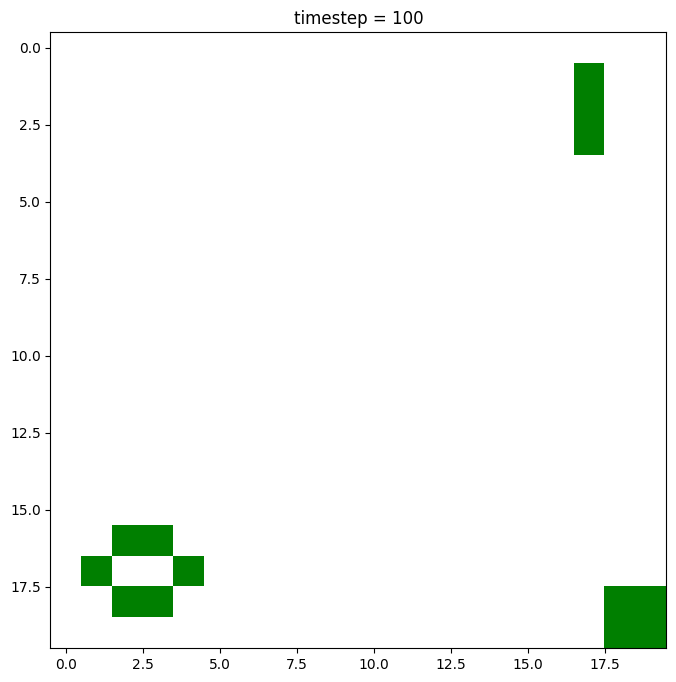

<Figure size 800x800 with 0 Axes>

In [16]:
# Put your code for Question 2.3 here

# Import helper functions
from GameOfLifePatterns import *
import matplotlib.pyplot as plt
# initial state array
initial_state = np.zeros((20,20))
initial_state = add_glider(initial_state,0,0,'SE')
initial_state = add_blinker(initial_state,1,17,'vertical')
initial_state = add_beehive(initial_state,16,1,'horizontal')

# create a GameOfLife object using the initial_state formed above
game = GameOfLife(initial_state)
# figure for animation
fig, ax = plt.subplots(figsize=(8,8)) # change figsize if needed

# draw the initial state
game.draw(fig)
# loop over 100 iterations
for i in range(100):
    game.update()
    game.draw(fig)
    # evolve the simulation by one timestep
    
    # draw the grid of cells
    


If everything went correctly, you should notice that the five living cells from the top right appear to move toward the bottom right corner and eventually end up in a $2x2$ square at the bottom right corner. Also, the three living cells in the top right area appear to alternate between being in a vertical line and a horizontal line, and the six living cells in the bottom left area don't move. If that doesn't describe what your animation does, you may need to debug your `Cell()` class code in Question 2.1.

&#9989; **Question 2.4 (11 points)**: Now that you've gotten a basic animation going, let's explore the behavior of some patterns in the Game of Life. The above simulation included the "glider", "blinker", and "beehive" patterns. The GameOfLifePatterns.py file includes functions to add five other patterns to an array. 

Since these patterns turn out to be a bit more complicated than the three in the simulation above, let's look at each of these patterns one at a time. For each of these five patterns ("pentadecathalon", "spaceship", "generator", "diehard", and "R"), create a simulation by doing the following: 

1. Create a numpy array of zeros of size $60 \times 60$ or bigger.
2. Use the corresponding function to add just that one pattern to the array. 
3. Run the simulation for at least $200$ iterations.
4. Briefly (1-3 sentences) describe what you observe.

Since we're asking you to do five **separate** simulations, but with very similar setups, you can either (1) write code in the cell below in a way that it is easy for someone to switch between simulations or (2) create a different code cell for each simulation.

Some tips:

1. You may want to read the docstrings in the GameOfLifePatterns.py file to understand how these functions work. You were also provided examples in the code for Question 2.3. 

2. The `row` and `col` arguments of the functions specify the location for the top-left corner. If you try to add a pattern in a location such that any part of the pattern goes outside the bounds for the array, you'll get an error. 

3. Most of these patterns are best placed in the middleish of the array, but the "generator" pattern is a bit cooler if you place it in the opposite corner as the direction you specify (e.g. top-left if `dir='SE'`, top-right if `dir='SW'`, bottom-left if `dir='NE'`, bottom-right if `dir='NW'`). 

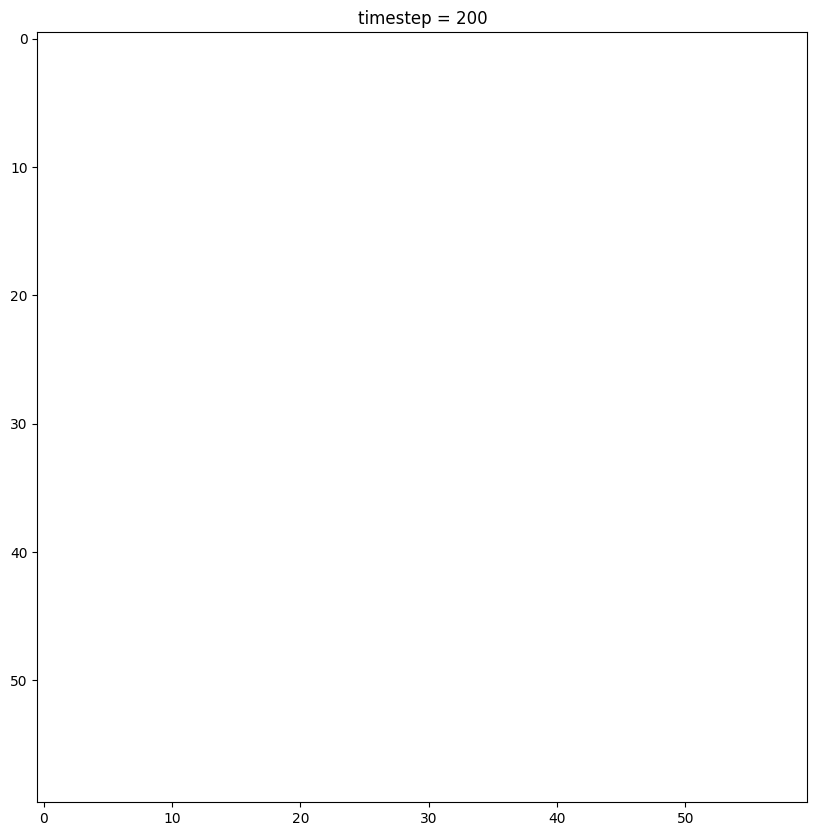

<Figure size 1000x1000 with 0 Axes>

In [27]:
# Put your code for Question 2.4 here
def run_simulation(pattern_function, dir='SE', iterations=200, size=(60, 60), position=(30, 30)):
    initial_state = np.zeros(size)
    initial_state = pattern_function(initial_state, *position, dir)
    game = GameOfLife(initial_state)
    fig, ax = plt.subplots(figsize=(10, 10))
    for _ in range(iterations):
        game.update()
        game.draw(fig)
#run_simulation(add_glider, 'SE', 200, (60, 60), (30, 30))
#run_simulation(add_pentadecathalon, 'NE', 200, (60, 60), (30, 30))
#run_simulation(add_generator, 'SE', 200, (60, 60), (30, 10))
run_simulation(add_diehard, 'SE', 200, (60, 60), (30, 30))


**<font size=+3>&#9998;</font> Put your observations here:**

**"pentadecathalon":** is straight and wiggly every few times

**"spaceship":** goes across in a certain direction and shifts location

**"generator":** makes a bunch of patterns and goes towards the corner

**"diehard":** disappears after some time

**"R"**: nothing happens

&#9989; **Question 2.5 (4 points)**: There are many other interesting patterns in the Game Of Life. Using an internet search or your own creativity, find at least one interesting pattern that wasn't included in the GameOfLife.py file. Then, form a reasonably sized 2D initial state array with that pattern somewhere on it and simulate several iterations of the Game of Life with that initial state below. Be sure to cite where you got the pattern from. 

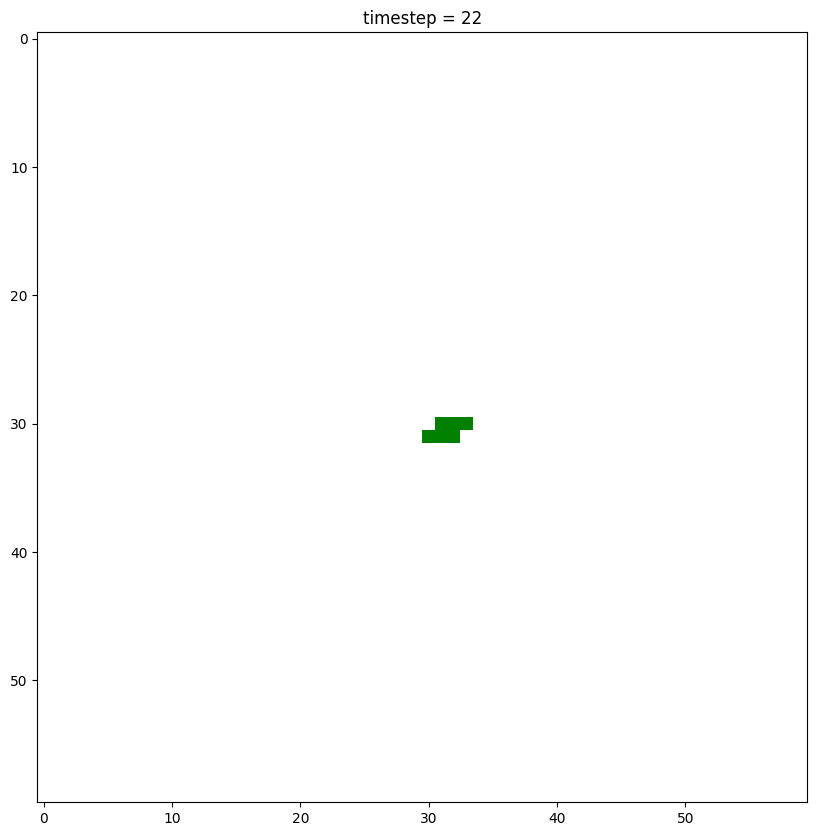

In [30]:
def add_toad_wrapper(grid, row, col, dir='SE'):
    def add_toad(grid, row, col):
        toad_pattern = np.array([
            [0, 1, 1, 1],
            [1, 1, 1, 0],
        ])
        grid[row:row+2, col:col+4] = toad_pattern
        return grid
    return add_toad(grid, row, col)
run_simulation(add_toad_wrapper, 'SE', 200, (60, 60), (30, 30))


---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Committing Part 2", and push the changes to GitHub.

---

---
## Part 3: Graph theory for sports data (33 points)

In this part of the homework, we will look at a dataset which contains the final score of all NCAA football games between Football Bowl Subdivision (FBS) teams during the 2023 regular season. We will model this data as a directed graph where each team is a node, and for each game, there is a directed edge from the winning team to the losing team. 

So for example, if we only had four teams (Team A, Team B, Team C, and Team D) and Team A beat Team B, Team A beat Team C, Team B beat Team C, and Team C beat Team D, our directed graph would look like this: 

<img src="https://i.ibb.co/VvKLQYy/Four-Team-Graph.png" width=150px align="center">

However, since there are several FBS teams and several games between them, our directed graph will actually have a lot more nodes and edges. Here's a pretty graph that someone else made with a similar but different dataset. <img src="http://blogs.acu.edu/coba/files/2016/12/ncaa-football-diagram-490x376.jpg" width=400px align="center" alt="Image credit: https://blogs.acu.edu/">

For those of you who don't know much about football or even sports in general, don't panic. No intricate sports knowledge is needed.

Technical note for sports fans: The dataset you will be using only include games where both teams are in the FBS. So for example, the game between `"Michigan State"` and `"Richmond"` is not in the dataset since `"Richmond"` is an FCS team.

&#9989;  **Question 3.1 (3 points)**: For convenience, you are provided with a file called `NCAAFootballScores2023.csv`, which you can download from here: 

`https://raw.githubusercontent.com/yangy5/HWFiles/main/NCAAFootballScores2023.csv`

Each row contains data from one game between two FBS teams. The first column contains the date that the game was played. The second and fourth columns contain the names of the home team and the away team respectively. The third and fifth columns contain the number of points that the home team and the away team scored respectively. 

**Do This:** Load the data in this file into a `Pandas` `DataFrame`, and **give the columns appropriate titles**. Display the first few and last few rows of the `DataFrame`. 

In [ ]:
# Put your code for Question 3.1 here:

Next, you will construct the directed graph to represent this data.

&#9989;  **Question 3.2 (5 points)**: Create an empty `DiGraph` object from the `networkx` package. For each row of the `DataFrame`, add a directed edge from the node corresponding to the winning team (the one with the larger score) to the node corresponding to the losing team (the one with the smaller score). Note that there are no ties in college football.

Remember that each edge in a directed graph has an orientation. So adding an edge from node A to node B is not the same thing as adding an edge from node B to node A. 

In [ ]:
# Put your code for Question 3.2 here:

This graph has over 100 nodes and hundreds of edges, so it will be hard to look at the entire graph at once. But we can construct and display a small subgraph of the entire directed graph.

&#9989;  **Question 3.3 (7 points)**: The cell below contains code which creates a dictionary whose keys are the names of the teams in the Big Ten Conference (yes, there are more than 10 teams in this dictionary) and whose values are tuples of coordinates. 

**Do the following**: 
* Using the `subgraph()` method in the `networkx` package, create another `DiGraph` object which is the subgraph of  induced by the nodes in the keys of the dictionary below. In other words, this subgraph should have only the nodes corresponding to the Big Ten teams and only the edges between teams in the Big Ten. 
* Then, draw this subgraph where each node is labeled with the team name and is at the position in the dictionary. 
* Finally, explicitly set the colors of the nodes, edges, and labels to any color scheme that you like. 

If you do this part correctly, you should get something that looks like this: <img src="https://i.ibb.co/FDQtG4J/Big-Ten-Subgraph.png" width=400px align="center">

In [ ]:
# Put your code for Question 3.3 here:
BigTen_positions = {"Michigan State":(0.63,0.92),"Michigan":(0.96,0.71),"Penn State":(1.17,0.38),"Rutgers":(1.25,0.0),
                    "Ohio State":(1.17,-0.38),"Maryland":(0.96,-0.71),"Indiana":(0.63,-0.92),
                    "Illinois":(-0.63,-0.92),"Purdue":(-0.96,-0.71),"Nebraska":(-1.17,-0.38),
                    "Iowa":(-1.25,0.0),"Northwestern":(-1.17,0.38),"Wisconsin":(-0.96,0.71),"Minnesota":(-0.63,0.92)}

&#9989;  **Question 3.4 (6 points total)**: For each part of Question 3.4, use either or both of the `DiGraph` objects you created along with a short amount of networkx code to find answer. **Note that you must use a networkx method to receive credit, and answers based on using the original csv file, the DataFrame, or by simply looking at the plot in Question 3.3 will not receive credit.**

**Question 3.4.1 (1 point)**: What is total number of FBS teams?

**Question 3.4.2 (1 point)**: What is total number of Big Ten teams?

**Question 3.4.3 (1 point)**: How many games did `"Michigan State"` play against Big Ten teams?

**Question 3.4.4 (1 point)**: How many games did `"Wisconsin"` win against FBS teams?

**Question 3.4.5 (1 point)**: How many games did `"Indiana"` lose against Big Ten teams?

**Question 3.4.6 (1 point)**: True or False?: `"Miami (Florida)"` lost to `"Georgia Tech"`. Note that these are not Big Ten teams. 

If you get stuck, look through the [`networkx` `DiGraph` documentation](https://networkx.org/documentation/stable/reference/classes/digraph.html) and/or think carefully about how teams and game results are represented in the two `DiGraph` objects. Searching the `networkx` documentation for some of the following terms will be helpful: "nodes", "has edge", "degree", "in degree", "out degree". Also, think carefully about whether you need to use the full graph with all the FBS teams or the subgraph with just the Big Ten teams for each question.

In [ ]:
# Question 3.4.1: What is total number of FBS teams?

In [ ]:
# Question 3.4.2: What is total number of Big Ten teams?

In [ ]:
# Question 3.4.3: How many games did "Michigan State" play against Big Ten teams?

In [ ]:
# Question 3.4.4: How many games did "Wisconsin" win against FBS teams?

In [ ]:
# Question 3.4.5: How many games did "Indiana" lose against Big Ten teams?

In [ ]:
# Question 3.4.6: True or False?: "Miami (Florida)" lost to "Georgia Tech". Note that these are not Big Ten teams.

&#9989;  **Question 3.5 (5 points)**: There are over 100 FBS teams, but each team only gets to play a few of the other teams. However, fans still want to be able to argue that their team is better than another team, even if their team didn't play and beat that other team. One way to do this is using the "transitive property". For example, if Team A beat Team B and Team B beat Team C, then Team A's fans can say "Since Team A is better than Team B, and Team B is better than Team C, Team A must be better than Team C." 

This isn't a perfectly logical argument since there is some luck in sports, and so the "better" team doesn't always win. Furthermore, if Team A beats Team B, Team B beats Team C, and Team C beats Team A, then the fanbases of all three teams can argue that their team is better than a team they lost to. Of course, arguments about sports are often not based on logic. :P

We can extend this "transitive property"-based reasoning by using more intermediate teams. In general, if Team $A_0$ beat Team $A_1$, Team $A_1$ beat Team $A_2$, ..., and Team $A_{n-1}$ beat Team $A_n$, then Team $A_0$'s fans can claim that Team $A_0$ is better than Team $A_n$. Obviously, the more intermediate teams you need, the less credible the argument sounds. The website https://www.myteamisbetterthanyourteam.com/ helps fans find a shortest path of comparisons to claim that their team is better than someone else's team. 

**Do this**: Our goal is to make a function that takes in the directed graph that you created along with two strings called `my_team` and `their_team`, and then prints a sequence of statements of the form "[TEAM NAME] beat [TEAM NAME]" which can be used to argue that `my_team` is better than `their team` (assuming such a sequence exists). To do this, the function will first use the `shortest_path()` method to generate a list of teams $[A_0,A_1,\ldots,A_n]$ which forms the shortest path from `my_team` to `their_team`. Then, it will iterate through this list to print out the sequence of statements "Team $A_i$ beat Team $A_{i+1}$".

In [ ]:
# Put your code for Question 3.5 here:
def find_argument(digraph,my_team,their_team): # Don't change this line
    

**Do This**: Test out your `find_argument()` method by running the cell below. The first few lines of the output should look something like this:


Michigan State is better than Alabama because ...  
Michigan State beat Central Michigan  
Central Michigan beat South Alabama  
South Alabama beat Oklahoma State  
Oklahoma State beat Oklahoma  
Oklahoma beat Texas  
Texas beat Alabama  


In [ ]:
# Replace the variable "digraph" with whatever you called your DiGraph with all FBS teams
print("Michigan State is better than Alabama because ...")
find_argument(digraph,"Michigan State","Alabama")
print("\nMichigan State is better than Minnesota because ...")
find_argument(digraph,"Michigan State","Minnesota")
print("\nMiddle Tennessee State is better than Missouri because ...")
find_argument(digraph,"Middle Tennessee State","Missouri")
print("\nMissouri is better than Middle Tennessee State because ...")
find_argument(digraph,"Missouri","Middle Tennessee State")
# Replace the variable "digraph" with whatever you called your DiGraph with all FBS teams

&#9989;  **Question 3.6 (5 points):** A graph/network is said to have a "[community structure](https://en.wikipedia.org/wiki/Community_structure)" if the nodes can be partitioned into communities such that generally nodes are connected to a high percentage of other nodes in the same community and a low percentage of nodes in other communities. Many real world graphs/networks (particularly those modeling social networks) have a "community structure". By taking a graph and detecting which nodes are part of tightly connected communities, we can often gain valuable insights into our graph. 


Most NCAA Football Bowl Subdivision teams are organized into conferences with 8 to 14 teams per conference. Typically, teams which are part of a conference will play most or all of the other teams in their conference and only a few teams outside their conference. Hence, the graph we generated with all the FBS teams will have this community structure. The pretty graph at the beginning of Part 3 is a good visualization of this structure.

Of course, we can easily look up which teams were in which conferences during the 2023 football season. However, let's see how easily we can detect this from the data. The Louvain method is one algorithm for community detection. If you are curious, you can read the Wikipedia article here https://en.wikipedia.org/wiki/Louvain_method, but it is not required.

**Do This:** First, make an undirected `Graph` that has the same nodes and edges as your `DiGraph` containing all FBS teams. There is a simple `networkx` `DiGraph` method to do this. Next, use the `louvain_communities()` method which is in the `community` subpackage of `networkx` to partition the graph into communities using the Louvain Community Detection Algorithm. The output of this method is a list of sets where each set represents a community. Finally, print the output of this algorithm.

You may want to read the documentation for the [`louvain_comminities()`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.louvain.louvain_communities.html) method.

In [ ]:
# Put your code for Question 3.6 here:

&#9989;  **Question 3.7 (2 points):** What teams were detected to be in the same community as `"Michigan State"`? How well does this match up with the teams that are in the Big Ten Conference? Are there any teams included in the same community as `"Michigan State"` that are not part of the Big Ten Conference? Are there any teams in the Big Ten Conference that were not included in the same community as `"Michigan State"`? (See Question 3.3 if you forgot which teams are in the Big Ten Conference). 

**Optional:** Those of you who are either sports fans or interested in community detection may want to look at the other communities that were detected and see how those align with the FBS conferences for the 2023 season. 

**<font size=+3>&#9998;</font> Put your answer here**

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Committing Part 3", and push the changes to GitHub.

---

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [ ]:


from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/aTDe5RGRAK" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Homework Assignments" folder, find the dropbox link for Homework #2, and upload **your notebook** there.

&#169; Copyright 2023,  Department of Computational Mathematics, Science and Engineering at Michigan State University